# Problem 1: Linear Regression

You are a part of an investment firm and your work is to do research about these 759 firms. 
You are provided with the dataset containing the sales and other attributes of these 759 firms. 
Predict the sales of these firms on the bases of the details given in the dataset so as to help your
company in investing consciously. 
Also, provide them with 5 attributes that are most important.

## 1.1) Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, data types, shape, EDA). Perform Univariate and Bivariate Analysis.

In [1319]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np


# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

import warnings
warnings.filterwarnings("ignore")

!pip install statsmodels

In [1320]:
#Importing the dataset
investment = pd.read_csv(r'D:\dsba\predictive modelling\extended project\Firm_level_data.csv')

In [1321]:
# copying data to another variable to avoid any changes to original data
df = investment.copy()
df.head()

,Unnamed: 0,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,0,826.99505,161.60399,10,382.07825,2.30600,no,11.04951,1625.45376,80.27000
1,1,407.75397,122.10101,2,0.00000,1.86000,no,0.84419,243.11708,59.02000
2,2,8407.84559,6221.14461,138,3296.70044,49.65900,yes,5.20526,25865.23380,47.70000
3,3,451.00001,266.89999,1,83.54016,3.07100,no,0.30522,63.02463,26.88000
4,4,174.92798,140.12400,2,14.23364,1.94700,no,1.06330,67.40641,49.46000


### Data Description 

Data dictionary

1. sales: Sales (in millions of dollars).
2. capital: Net stock of property, plant, and equipment.
3. patents: Granted patents.
4. randd: R&amp;D stock (in millions of dollars).
5. employment: Employment (in 1000s).
6. sp500: Membership of firms in the S&amp;P 500 index. S&amp;P is a stock market index that measures
the stock performance of 500 large companies listed on stock exchanges in the United States
7. tobinq: Tobin&#39;s q (also known as q ratio and Kaldor&#39;s v) is the ratio between a physical asset&#39;s
market value and its replacement value.
8. value: Stock market value.
9. institutions: Proportion of stock owned by institutions.

In [1322]:
df.shape

(759, 10)

In [1323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    759 non-null    int64  
 1   sales         759 non-null    float64
 2   capital       759 non-null    float64
 3   patents       759 non-null    int64  
 4   randd         759 non-null    float64
 5   employment    759 non-null    float64
 6   sp500         759 non-null    object 
 7   tobinq        738 non-null    float64
 8   value         759 non-null    float64
 9   institutions  759 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 59.4+ KB


In [1324]:
# checking for duplicate values
duplicate = df.duplicated()
print('Number of duplicate rows = %d' % (duplicate.sum()))

Number of duplicate rows = 0


In [1325]:
df.describe()

,Unnamed: 0,sales,capital,patents,randd,employment,tobinq,value,institutions
count,759.00000,759.00000,759.00000,759.00000,759.00000,759.00000,738.00000,759.00000,759.00000
mean,379.00000,2689.70516,1977.74750,25.83136,439.93807,14.16452,2.79491,2732.73475,43.02054
std,219.24872,8722.06012,6466.70490,97.25958,2007.39759,43.32144,3.36659,7071.07236,21.68559
min,0.00000,0.13800,0.05700,0.00000,0.00000,0.00600,0.11900,1.97105,0.00000
25%,189.50000,122.92000,52.65050,1.00000,4.62826,0.92750,1.01878,103.59395,25.39500
50%,379.00000,448.57708,202.17902,3.00000,36.86414,2.92400,1.68030,410.79353,44.11000
75%,568.50000,1822.54737,1075.79002,11.50000,143.25340,10.05000,3.13931,2054.16039,60.51000
max,758.00000,135696.78820,93625.20056,1220.00000,30425.25586,710.79993,20.00000,95191.59116,90.15000


In [1326]:
#Dropping Unnamed:0 column
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,826.99505,161.60399,10,382.07825,2.30600,no,11.04951,1625.45376,80.27000
1,407.75397,122.10101,2,0.00000,1.86000,no,0.84419,243.11708,59.02000
2,8407.84559,6221.14461,138,3296.70044,49.65900,yes,5.20526,25865.23380,47.70000
3,451.00001,266.89999,1,83.54016,3.07100,no,0.30522,63.02463,26.88000
4,174.92798,140.12400,2,14.23364,1.94700,no,1.06330,67.40641,49.46000


### Exploratory Data Analysis 

#### Univariate Analysis

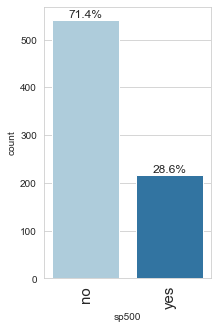

In [1327]:
#Observations on membership of firms in the S&P 500 index
# function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot
    
labeled_barplot(df, "sp500", perc=True)

In [1328]:
# function to plot a boxplot and a histogram along the same scale for numeric data.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

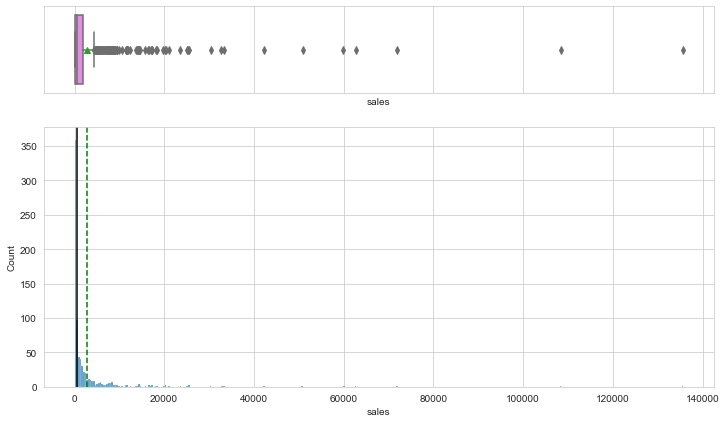

In [1329]:
histogram_boxplot(df, "sales")

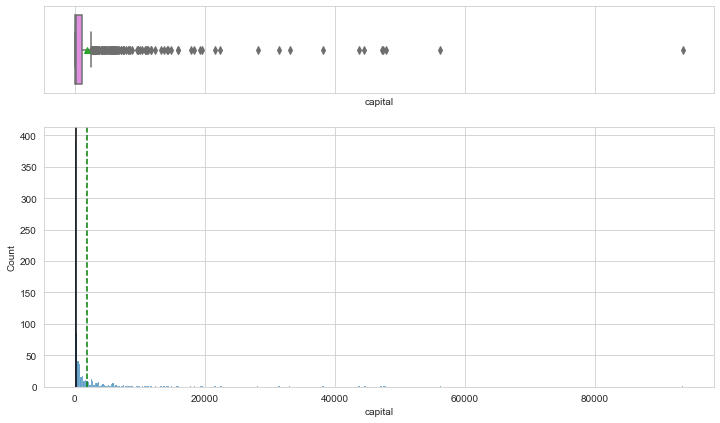

In [1330]:
histogram_boxplot(df, "capital")

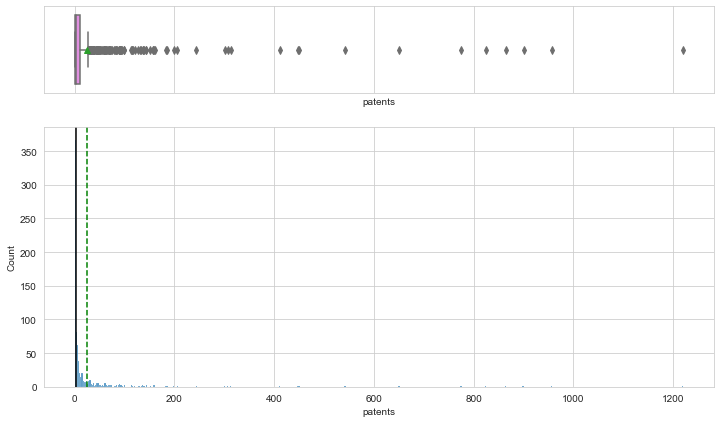

In [1331]:
histogram_boxplot(df, "patents")

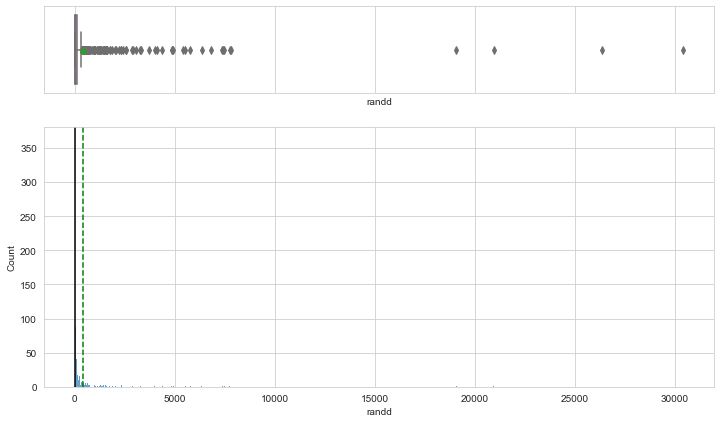

In [1332]:
histogram_boxplot(df, "randd")

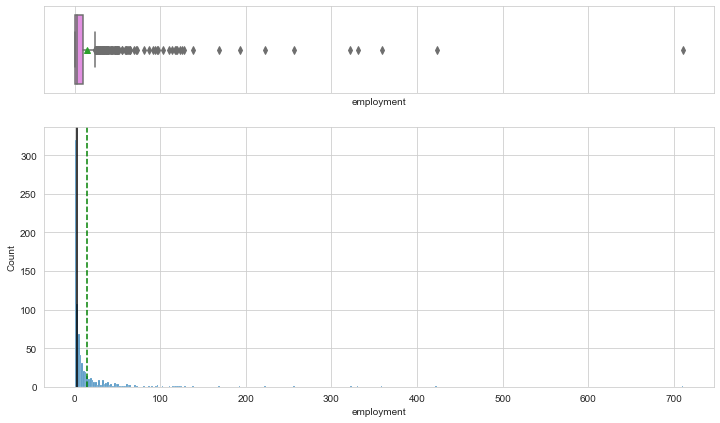

In [1333]:
histogram_boxplot(df, "employment")

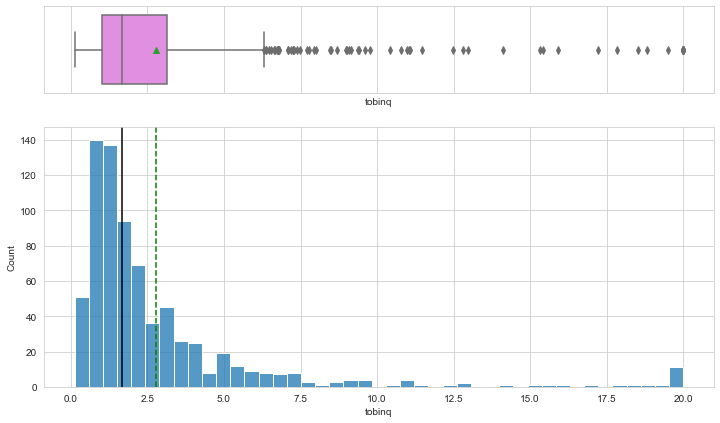

In [1334]:
histogram_boxplot(df, "tobinq")

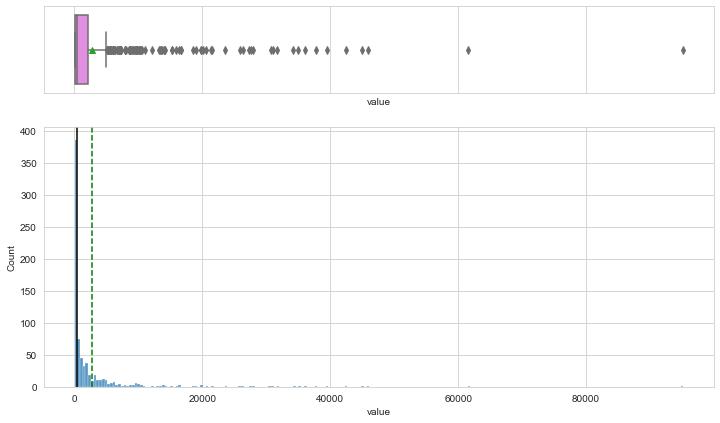

In [1335]:
histogram_boxplot(df, "value")

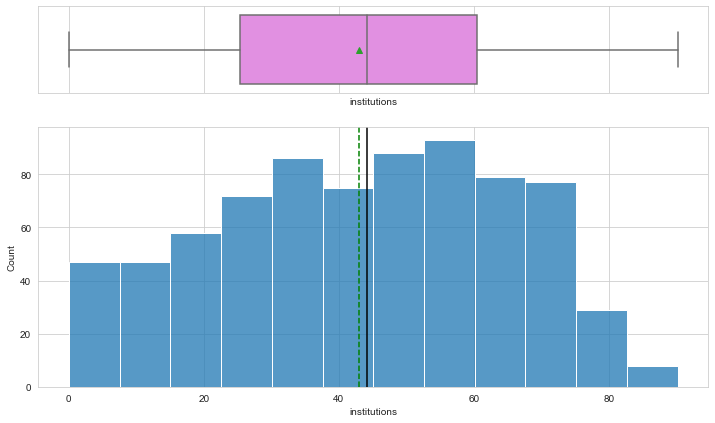

In [1336]:
histogram_boxplot(df, "institutions")

#### Bivariate Analysis

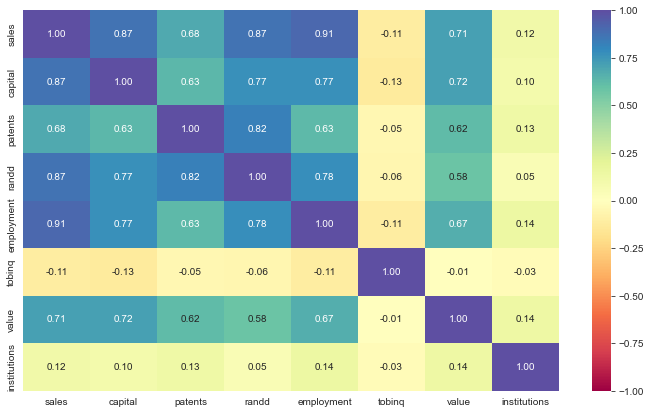

In [1337]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

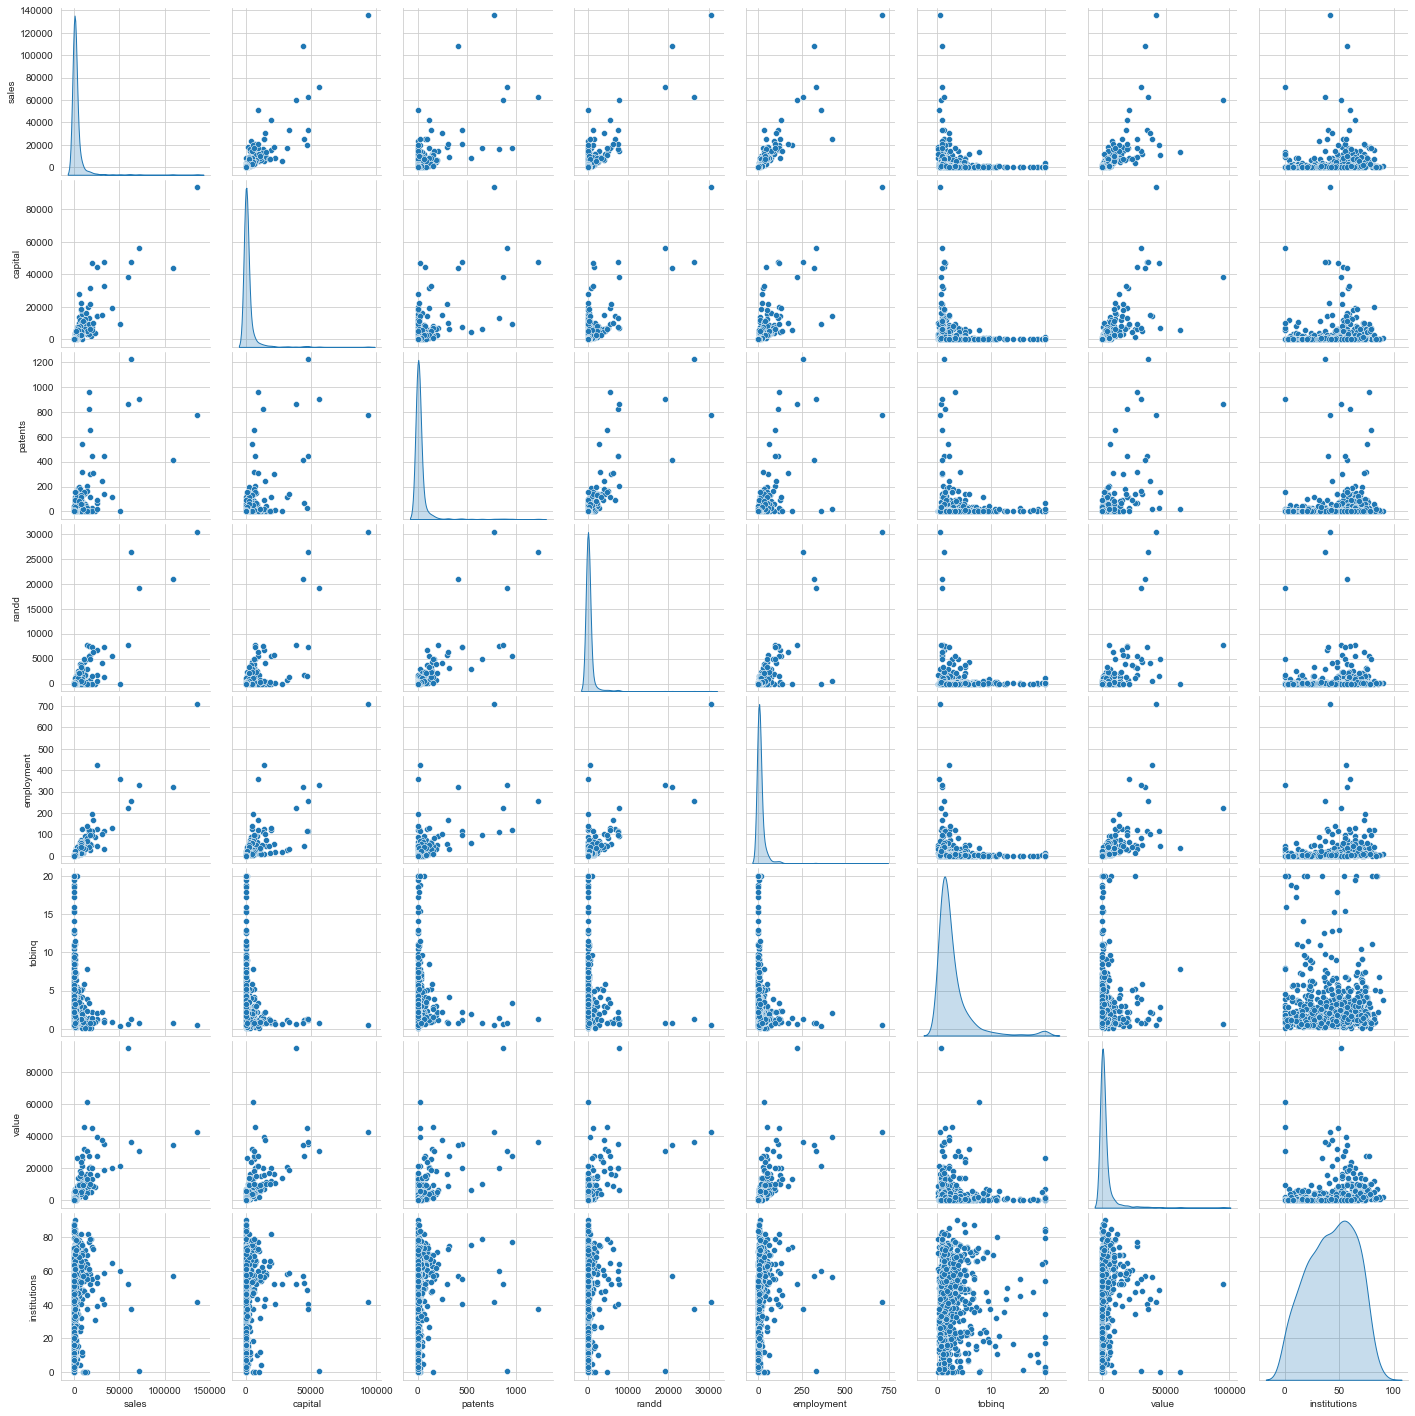

In [1338]:
sns.pairplot(df, diag_kind='kde')

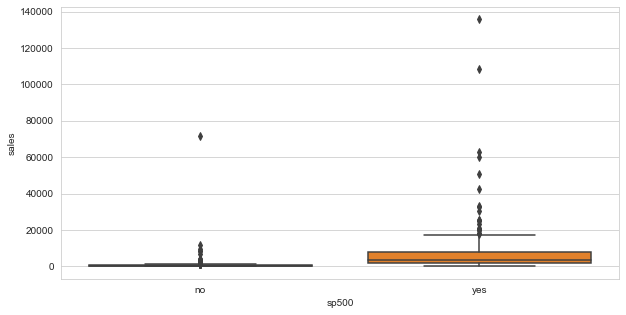

In [1339]:
#sp500 vs sales
plt.figure(figsize=(10, 5))
sns.boxplot(df["sp500"], df["sales"])
plt.show()

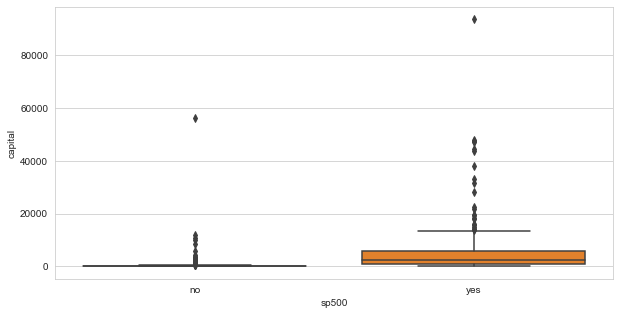

In [1340]:
#sp500 vs capital
plt.figure(figsize=(10, 5))
sns.boxplot(df["sp500"], df["capital"])
plt.show()

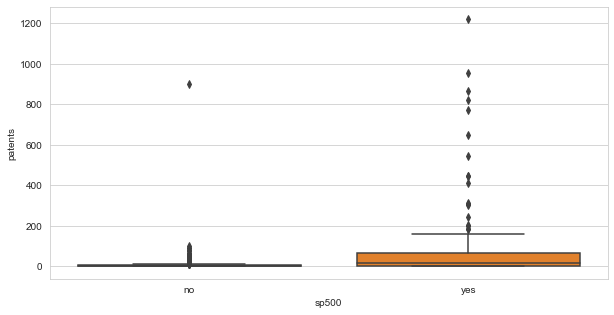

In [1341]:
#sp500 vs patents
plt.figure(figsize=(10, 5))
sns.boxplot(df["sp500"], df["patents"])
plt.show()

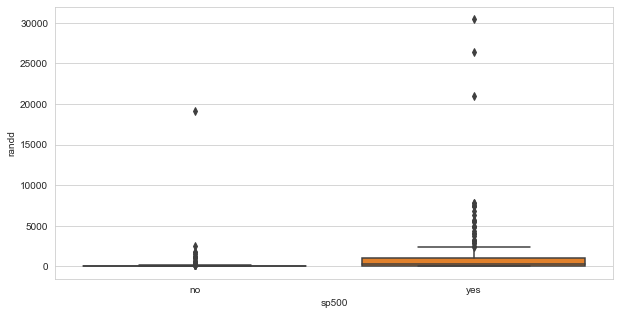

In [1342]:
#sp500 vs randd
plt.figure(figsize=(10, 5))
sns.boxplot(df["sp500"], df["randd"])
plt.show()

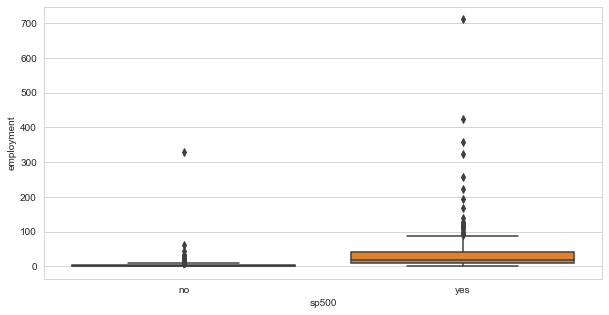

In [1343]:
#sp500 vs employment
plt.figure(figsize=(10, 5))
sns.boxplot(df["sp500"], df["employment"])
plt.show()

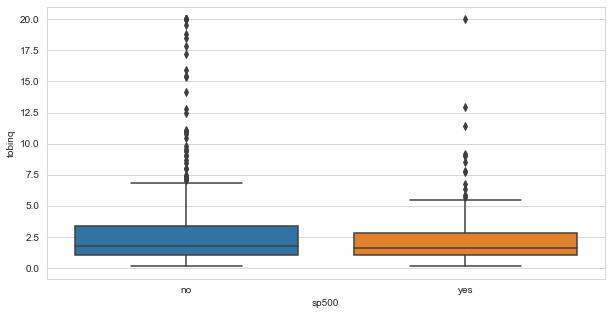

In [1344]:
#sp500 vs tobinq
plt.figure(figsize=(10, 5))
sns.boxplot(df["sp500"], df["tobinq"])
plt.show()

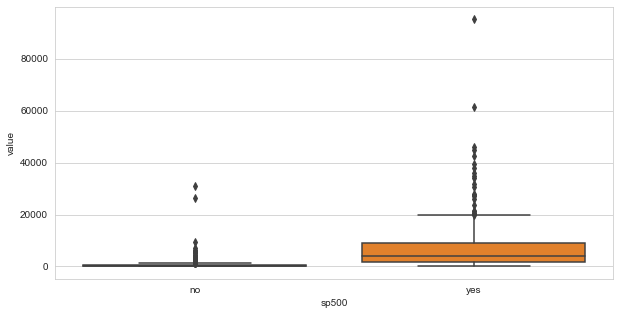

In [1345]:
#sp500 vs value
plt.figure(figsize=(10, 5))
sns.boxplot(df["sp500"], df["value"])
plt.show()

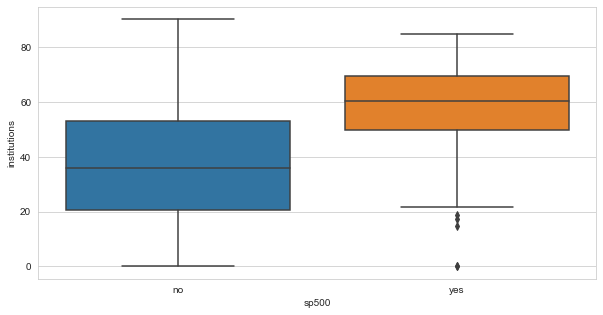

In [1346]:
#sp500 vs institution
plt.figure(figsize=(10, 5))
sns.boxplot(df["sp500"], df["institutions"])
plt.show()

## 1.2) Impute null values if present? Do you think scaling is necessary in this case? 

In [1347]:
# Check for missing values in the entire DataFrame
missing_values = df.isnull().sum()

# Print the count of missing values for each column
print("Missing Values:")
print(missing_values)

Missing Values:
sales            0
capital          0
patents          0
randd            0
employment       0
sp500            0
tobinq          21
value            0
institutions     0
dtype: int64


The tobinq column of the dataset has null values. Hence, there's need for imputation. 

In [1348]:
#Median imputation since data is skewed and has outliers
df['tobinq'].fillna(df['tobinq'].median(), inplace=True)

In [1349]:
# Check for missing values in the entire DataFrame
missing_values = df.isnull().sum()

# Print the count of missing values for each column
print("Missing Values:")
print(missing_values)

Missing Values:
sales           0
capital         0
patents         0
randd           0
employment      0
sp500           0
tobinq          0
value           0
institutions    0
dtype: int64


- Scaling is necessary because:

1) The features have vastly different ranges, so scaling is necessary. Features with larger ranges can dominate those with smaller ranges during model training, potentially leading to biased or inefficient models.

2) Algorithms that involve gradient descent, such as linear regression, logistic regression etc., benefit from feature scaling.

In [1350]:
#Treating the outliers before scaling
df_num = df.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_num.columns.values)
lstnumericcolumns

['sales',
 'capital',
 'patents',
 'randd',
 'employment',
 'tobinq',
 'value',
 'institutions']

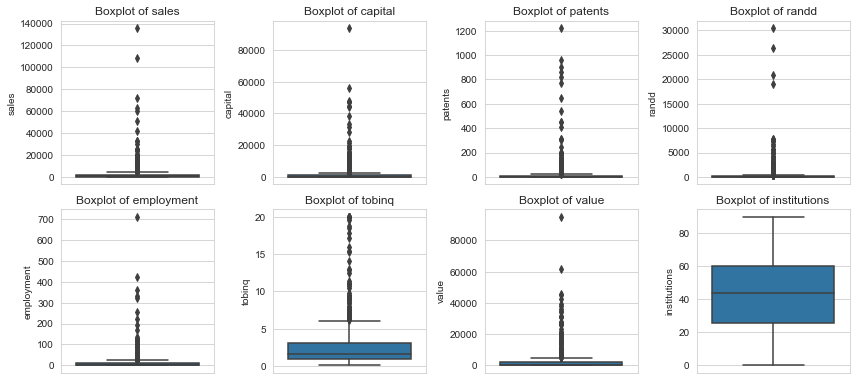

In [1351]:
#Check for presence of outliers in each feature
plt.figure(figsize = (12,8))
feature_list = df_num.columns
for i in range(len(feature_list)):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y = df_num[feature_list[i]], data = df_num)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [1352]:
#Define a function which returns the Upper and Lower limit to detect outliers for each feature
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range  

In [1353]:
#Cap & floor the values beyond the outlier boundaries
for i in feature_list:
    LL, UL = remove_outlier(df_num[i])
    df_num[i] = np.where(df_num[i] > UL, UL, df_num[i])
    df_num[i] = np.where(df_num[i] < LL, LL, df_num[i])

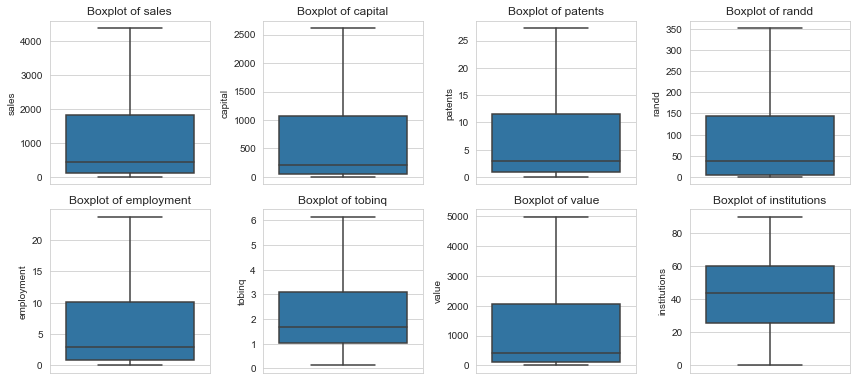

In [1354]:
#Check to verify if outliers have been treated
plt.figure(figsize = (12,8))
feature_list = df_num.columns
for i in range(len(feature_list)):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y = df_num[feature_list[i]], data = df_num)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [1355]:
#Scaling using z-score method
from scipy.stats import zscore
df_num = df_num.apply(zscore)
df_num.head()

,sales,capital,patents,randd,employment,tobinq,value,institutions
0,-0.26779,-0.59150,0.22115,1.97999,-0.56480,2.23767,0.14260,1.71884
1,-0.54222,-0.63271,-0.58318,-0.78288,-0.61933,-0.84571,-0.64581,0.73828
2,2.05272,1.96272,1.95550,1.97999,2.05512,1.68700,2.05584,0.21593
3,-0.51391,-0.48168,-0.68372,-0.12566,-0.47127,-1.15871,-0.74852,-0.74479
4,-0.69462,-0.61391,-0.58318,-0.67090,-0.60869,-0.71846,-0.74602,0.29714


In [1356]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
sales,759.00000,0.00000,1.00066,-0.80904,-0.72867,-0.51549,0.38389,2.05272
capital,759.00000,0.00000,1.00066,-0.76000,-0.70514,-0.54918,0.36200,1.96272
patents,759.00000,0.00000,1.00066,-0.78426,-0.68372,-0.48264,0.37196,1.95550
randd,759.00000,-0.00000,1.00066,-0.78288,-0.74647,-0.49286,0.34411,1.97999
employment,759.00000,0.00000,1.00066,-0.84601,-0.73335,-0.48924,0.38204,2.05512
tobinq,759.00000,0.00000,1.00066,-1.26686,-0.73431,-0.36013,0.45448,2.23767
value,759.00000,0.00000,1.00066,-0.78334,-0.72538,-0.55017,0.38711,2.05584
institutions,759.00000,0.00000,1.00066,-1.98514,-0.81331,0.05027,0.80703,2.17474


## 1.3) Encode the data (having string values) for Modelling. Data Split: Split the data into test and train (70:30). Apply Linear regression. Performance Metrics: Check the performance of Predictions on Train and Test sets using R-square, RMSE.

In [1357]:
# Reset index to align indices for concatenation
df_num.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)

# Concatenate the scaled numerical columns with the original object columns
inv = pd.concat([df_num, df.select_dtypes(include='object')], axis=1)

In [1358]:
inv.head()

,sales,capital,patents,randd,employment,tobinq,value,institutions,sp500
0,-0.26779,-0.59150,0.22115,1.97999,-0.56480,2.23767,0.14260,1.71884,no
1,-0.54222,-0.63271,-0.58318,-0.78288,-0.61933,-0.84571,-0.64581,0.73828,no
2,2.05272,1.96272,1.95550,1.97999,2.05512,1.68700,2.05584,0.21593,yes
3,-0.51391,-0.48168,-0.68372,-0.12566,-0.47127,-1.15871,-0.74852,-0.74479,no
4,-0.69462,-0.61391,-0.58318,-0.67090,-0.60869,-0.71846,-0.74602,0.29714,no


In [1359]:
from sklearn.preprocessing import LabelEncoder

# Create LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the 'sp500' column
inv['sp500_encoded'] = label_encoder.fit_transform(inv['sp500'])

In [1360]:
inv.head()

,sales,capital,patents,randd,employment,tobinq,value,institutions,sp500,sp500_encoded
0,-0.26779,-0.59150,0.22115,1.97999,-0.56480,2.23767,0.14260,1.71884,no,0
1,-0.54222,-0.63271,-0.58318,-0.78288,-0.61933,-0.84571,-0.64581,0.73828,no,0
2,2.05272,1.96272,1.95550,1.97999,2.05512,1.68700,2.05584,0.21593,yes,1
3,-0.51391,-0.48168,-0.68372,-0.12566,-0.47127,-1.15871,-0.74852,-0.74479,no,0
4,-0.69462,-0.61391,-0.58318,-0.67090,-0.60869,-0.71846,-0.74602,0.29714,no,0


In [1361]:
#Dropping sp500 column
inv.drop('sp500', axis=1, inplace=True)
inv.head()

,sales,capital,patents,randd,employment,tobinq,value,institutions,sp500_encoded
0,-0.26779,-0.59150,0.22115,1.97999,-0.56480,2.23767,0.14260,1.71884,0
1,-0.54222,-0.63271,-0.58318,-0.78288,-0.61933,-0.84571,-0.64581,0.73828,0
2,2.05272,1.96272,1.95550,1.97999,2.05512,1.68700,2.05584,0.21593,1
3,-0.51391,-0.48168,-0.68372,-0.12566,-0.47127,-1.15871,-0.74852,-0.74479,0
4,-0.69462,-0.61391,-0.58318,-0.67090,-0.60869,-0.71846,-0.74602,0.29714,0


#### Linear Regression using statsmodel(OLS)

In [1362]:
import statsmodels.api as sm
# independent variables
X = inv.drop(["sales"], axis=1)
# dependent variable
y = inv[["sales"]]

In [1363]:
# let's add the intercept to data
X = sm.add_constant(X)

In [1364]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)

In [1365]:
# let's print the regression summary
print(olsres.summary())

                                 OLS Regression Results                                
Dep. Variable:                  sales   R-squared (uncentered):                   0.936
Model:                            OLS   Adj. R-squared (uncentered):              0.935
Method:                 Least Squares   F-statistic:                              950.4
Date:                Mon, 08 Apr 2024   Prob (F-statistic):                   7.03e-306
Time:                        14:38:42   Log-Likelihood:                         -35.777
No. Observations:                 531   AIC:                                      87.55
Df Residuals:                     523   BIC:                                      121.8
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [1366]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const           2.19480
capital         5.66489
patents         2.65796
randd           2.94361
employment      5.26334
tobinq          1.42652
value           6.70601
institutions    1.28667
sp500_encoded   3.05160
dtype: float64



Patents, randd, tobinq, institutions, and sp500_encoded have VIF values below 5, indicating low multicollinearity.

Capital, employment, and value have VIF values between 5 and 10, suggesting moderate multicollinearity.

In [1367]:
X_train.columns

Index(['const', 'capital', 'patents', 'randd', 'employment', 'tobinq', 'value',
       'institutions', 'sp500_encoded'],
      dtype='object')

In [1368]:
#1) Removing predictor 'capital' as VIF>2
X_train2 = X_train.drop(["capital"], axis=1)
olsmod_1 = sm.OLS(y_train, X_train2)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.925 
Adjusted R-squared: 0.924


In [1369]:
#4) Removing predictor 'employment' as VIF>2
X_train5 = X_train.drop(["employment"], axis=1)
olsmod_4 = sm.OLS(y_train, X_train5)
olsres_4 = olsmod_4.fit()
print(
    "R-squared:",
    np.round(olsres_4.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_4.rsquared_adj, 3),
)

R-squared: 0.903 
Adjusted R-squared: 0.901


In [1370]:
#5) Removing predictor 'value' as VIF>2
X_train6 = X_train.drop(["value"], axis=1)
olsmod_5 = sm.OLS(y_train, X_train6)
olsres_5 = olsmod_5.fit()
print(
    "R-squared:",
    np.round(olsres_5.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_5.rsquared_adj, 3),
)

R-squared: 0.925 
Adjusted R-squared: 0.924


After dropping the features causing strong multicollinearity and the statistically insignificant ones, our model performance (R-square values, Cond No., etc) hasn't dropped sharply . 

This shows that these variables did not have much predictive power.

**Testing the Assumptions of Linear Regression**

For Linear Regression, we need to check if the following assumptions hold:-
1. Linearity
2. Independence
3. Homoscedasticity
4. Normality of error terms
5. No strong Multicollinearity

In [1371]:
#Linearity and Independence of predictors
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = olsres.fittedvalues.values  # predicted values
df_pred["Residuals"] = olsres.resid.values  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
0,0.46550,0.77953,-0.31403
1,-0.76964,-0.72464,-0.04500
2,-0.11150,-0.15524,0.04373
3,-0.02778,0.24676,-0.27454
4,-0.70169,-0.54844,-0.15324


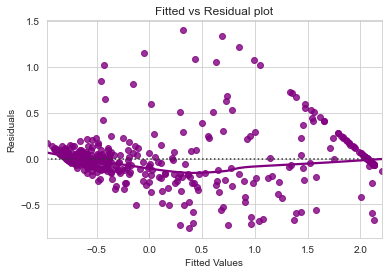

In [1372]:
# let us plot the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

No pattern in the data thus the assumption of linearity and independence of predictors satisfied

In [1373]:
#Test for Normality
from scipy import stats
from scipy.stats import norm
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.8050593137741089, pvalue=8.611340733822584e-25)

Since p-value < 0.05, the residuals are not normal as per shapiro test.

In [1374]:
#Test for Homoscedasticity
import statsmodels.stats.api as sms
sms.het_goldfeldquandt(df_pred["Residuals"], X_train)[1]

0.6899591702150669

Since p-value > 0.05 we can say that the residuals are homoscedastic.

In [1375]:
olsres_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     1092.
Date:                Mon, 08 Apr 2024   Prob (F-statistic):          2.18e-307
Time:                        14:38:43   Log-Likelihood:                -34.351
No. Observations:                 531   AIC:                             84.70
Df Residuals:                     523   BIC:                             118.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0288      0.017     -1.732      0.084      -0.061       0.004
capital           0.2539      0.026      9.661      0.000       0.202       0.305
patents          -0.0300      0.018     -1.661      0.097      -0.065       0.005
randd             0.0532      0.019      2.753      0.006       0.015       0.091
employment        0.4211      0.025     16.619      0.000       0.371       0.471
tobinq           -0.0461      0.014     -3.396      0.001      -0.073      -0.019
value             0.2820      0.029      9.668      0.000       0.225       0.339
sp500_encoded     0.1117      0.043      2.614      0.009       0.028       0.196
==============================================================================
Omnibus:                      185.525   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1280.442
Skew:                           1.352   Prob(JB):                    9.03e-279
Kurtosis:                      10.110   Cond. No.                         8.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1376]:
# Let us write the equation of linear regression
Equation = "sales ="
print(Equation, end=" ")
for i in range(len(X_train9.columns)):
    if i == 0:
        print(olsres_8.params[i], "+", end=" ")
    elif i != len(X_train9.columns) - 1:
        print(
            olsres_8.params[i],
            "* (",
            X_train9.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsres_8.params[i], "* (", X_train9.columns[i], ")")

sales = -0.028786883868058888 + 0.25385092961544264 * ( capital ) +  -0.03000236237465888 * ( patents ) +  0.05315127066829384 * ( randd ) +  0.4211458601045237 * ( employment ) +  -0.04609218846465864 * ( tobinq ) +  0.2819938049088843 * ( value ) +  0.11173693955527303 * ( sp500_encoded )


**Observations**

- 1 unit increase in the capital leads to a 0.25 times increase in the sales value.
- 1 unit increase in the no.of patents leads to a 0.03 times decrease in the sales value.
- 1 unit increase in investment in R&D stock leads to 0.053 times increase in sales value.
- 1 unit increase in employees (in 1000s) leads to 0.42 times increase in sales value.

In [1377]:
# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [1378]:
# let's check the RMSE on the train data
rmse1 = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse1

0.2581413706849034

In [1222]:
# let's check the RMSE on the test data
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred_test))
rmse2

0.2620800092854357

#### Linear Regression using (sklearn) 

In [1223]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train9, y_train)

LinearRegression()

In [1224]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train9.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for const is 0.0
The coefficient for capital is 0.25385092961544203
The coefficient for patents is -0.03000236237466011
The coefficient for randd is 0.053151270668294705
The coefficient for employment is 0.42114586010452315
The coefficient for tobinq is -0.04609218846465842
The coefficient for value is 0.28199380490888387
The coefficient for sp500_encoded is 0.11173693955527285


In [1225]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -0.028786883868058794


In [1226]:
# R square on training data
regression_model.score(X_train9, y_train)

0.9359634134514305

93% of the variation in the sales value is explained by the predictors in the model for train set

In [1227]:
# R square on testing data
regression_model.score(X_test2, y_test)

0.9238893416307077

In [1228]:
#RMSE on Training data
from sklearn import metrics
predicted_train=regression_model.fit(X_train9, y_train).predict(X_train9)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.25814137068490334

In [1229]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train9, y_train).predict(X_test2)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

0.2620800092854356

# Problem 2: Logistic Regression and Linear Discriminant Analysis

You are hired by the Government to do an analysis of car crashes. You are provided details of
car crashes, among which some people survived and some didn't. You have to help the government in predicting whether a person will survive or not on the basis of the information given in the data set so as to provide insights that will help the government to make stronger laws for car manufacturers to ensure safety measures. Also, find out the important factors on the basis of which you made your predictions.

## 2.1) Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [1230]:
#Importing the dataset
car_crash = pd.read_csv(r'D:\dsba\predictive modelling\extended project\Car_Crash.csv')

In [1231]:
# copying data to another variable to avoid any changes to original data
car = car_crash.copy()
car.head()

,Unnamed: 0,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
0,0,55+,27.07800,Not_Survived,none,none,1,m,32,1997,1987.00000,unavail,driver,0,4.00000,2:13:2
1,1,25-39,89.62700,Not_Survived,airbag,belted,0,f,54,1997,1994.00000,nodeploy,driver,0,4.00000,2:17:1
2,2,55+,27.07800,Not_Survived,none,belted,1,m,67,1997,1992.00000,unavail,driver,0,4.00000,2:79:1
3,3,55+,27.07800,Not_Survived,none,belted,1,f,64,1997,1992.00000,unavail,pass,0,4.00000,2:79:1
4,4,55+,13.37400,Not_Survived,none,none,1,m,23,1997,1986.00000,unavail,driver,0,4.00000,4:58:1


### Data Description  

1. dvcat: factor with levels (estimated impact speeds) 1-9km/h, 10-24, 25-39, 40-54, 55+
2. weight: Observation weights, albeit of uncertain accuracy, designed to account for varying sampling probabilities. (The inverse probability weighting estimator can be used to demonstrate causality when the researcher cannot conduct a controlled experiment but has observed data to model)
3. Survived: factor with levels Survived or not_survived
4. airbag: a factor with levels none or airbag
5. seatbelt: a factor with levels none or belted
6. frontal: a numeric vector; 0 = non-frontal, 1=frontal impact
7. sex: a factor with levels f: Female or m: Male
8. ageOFocc: age of occupant in years
9. yearacc: year of accident
10. yearVeh: Year of model of vehicle; a numeric vector
11. abcat: Did one or more (driver or passenger) airbag(s) deploy? This factor has levels deploy, nodeploy and unavail
12. occRole: a factor with levels driver or pass: passenger
13. deploy: a numeric vector: 0 if an airbag was unavailable or did not deploy; 1 if one or more bags deployed.
14. injSeverity: a numeric vector; 0: none, 1: possible injury, 2: no incapacity, 3: incapacity, 4: killed; 5: unknown, 6: prior death
15. caseid: character, created by pasting together the populations sampling unit, the case number, and the vehicle number. Within each year, use this to uniquely identify the vehicle.

In [1232]:
car.shape

(11217, 16)

In [1233]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11217 entries, 0 to 11216
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   11217 non-null  int64  
 1   dvcat        11217 non-null  object 
 2   weight       11217 non-null  float64
 3   Survived     11217 non-null  object 
 4   airbag       11217 non-null  object 
 5   seatbelt     11217 non-null  object 
 6   frontal      11217 non-null  int64  
 7   sex          11217 non-null  object 
 8   ageOFocc     11217 non-null  int64  
 9   yearacc      11217 non-null  int64  
 10  yearVeh      11217 non-null  float64
 11  abcat        11217 non-null  object 
 12  occRole      11217 non-null  object 
 13  deploy       11217 non-null  int64  
 14  injSeverity  11140 non-null  float64
 15  caseid       11217 non-null  object 
dtypes: float64(3), int64(5), object(8)
memory usage: 1.4+ MB


In [1234]:
# checking for duplicate values
duplicate = car.duplicated()
print('Number of duplicate rows = %d' % (duplicate.sum()))

Number of duplicate rows = 0


In [1235]:
car.describe()

,Unnamed: 0,weight,frontal,ageOFocc,yearacc,yearVeh,deploy,injSeverity
count,11217.00000,11217.00000,11217.00000,11217.00000,11217.00000,11217.00000,11217.00000,11140.00000
mean,5608.00000,431.40531,0.64402,37.42765,2001.10324,1994.17794,0.38914,1.82558
std,3238.21332,1406.20294,0.47883,18.19243,1.05681,5.65870,0.48758,1.37854
min,0.00000,0.00000,0.00000,16.00000,1997.00000,1953.00000,0.00000,0.00000
25%,2804.00000,28.29200,0.00000,22.00000,2001.00000,1991.00000,0.00000,1.00000
50%,5608.00000,82.19500,1.00000,33.00000,2001.00000,1995.00000,0.00000,2.00000
75%,8412.00000,324.05600,1.00000,48.00000,2002.00000,1999.00000,1.00000,3.00000
max,11216.00000,31694.04000,1.00000,97.00000,2002.00000,2003.00000,1.00000,5.00000


In [1236]:
#Dropping Unnamed:0 and caseid columns
car.drop('Unnamed: 0', axis=1, inplace=True)
car.drop('caseid', axis=1, inplace=True)
car.head()

,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity
0,55+,27.07800,Not_Survived,none,none,1,m,32,1997,1987.00000,unavail,driver,0,4.00000
1,25-39,89.62700,Not_Survived,airbag,belted,0,f,54,1997,1994.00000,nodeploy,driver,0,4.00000
2,55+,27.07800,Not_Survived,none,belted,1,m,67,1997,1992.00000,unavail,driver,0,4.00000
3,55+,27.07800,Not_Survived,none,belted,1,f,64,1997,1992.00000,unavail,pass,0,4.00000
4,55+,13.37400,Not_Survived,none,none,1,m,23,1997,1986.00000,unavail,driver,0,4.00000


In [1237]:
# Check for missing values in the entire DataFrame
missing_values = car.isnull().sum()

# Print the count of missing values for each column
print("Missing Values:")
print(missing_values)

Missing Values:
dvcat           0
weight          0
Survived        0
airbag          0
seatbelt        0
frontal         0
sex             0
ageOFocc        0
yearacc         0
yearVeh         0
abcat           0
occRole         0
deploy          0
injSeverity    77
dtype: int64


In [1238]:
#Mode imputation 
car['injSeverity'].fillna(car['injSeverity'].median(), inplace=True)

In [1239]:
# Check for missing values in the entire DataFrame
missing_values = car.isnull().sum()

# Print the count of missing values for each column
print("Missing Values:")
print(missing_values)

Missing Values:
dvcat          0
weight         0
Survived       0
airbag         0
seatbelt       0
frontal        0
sex            0
ageOFocc       0
yearacc        0
yearVeh        0
abcat          0
occRole        0
deploy         0
injSeverity    0
dtype: int64


In [1240]:
def get_value_counts(car):
    
    value_counts = {}
    
    for column in car.columns:
        value_counts[column] = car[column].value_counts()
    
    return value_counts

# Assuming 'df' is your DataFrame containing the dataset
# Call the function to get value counts for each column
value_counts = get_value_counts(car)

# Print value counts for each column
for column, counts in value_counts.items():
    print(f"Value counts for column '{column}':\n{counts}\n")

Value counts for column 'dvcat':
10-24      5414
25-39      3368
40-54      1344
55+         809
1-9km/h     282
Name: dvcat, dtype: int64

Value counts for column 'weight':
1.00000      65
72.17600     57
38.99400     53
54.30300     52
10.76100     51
             ..
207.71400     1
219.91500     1
6.00500       1
132.93200     1
54.29900      1
Name: weight, Length: 4551, dtype: int64

Value counts for column 'Survived':
survived        10037
Not_Survived     1180
Name: Survived, dtype: int64

Value counts for column 'airbag':
airbag    7064
none      4153
Name: airbag, dtype: int64

Value counts for column 'seatbelt':
belted    7849
none      3368
Name: seatbelt, dtype: int64

Value counts for column 'frontal':
1    7224
0    3993
Name: frontal, dtype: int64

Value counts for column 'sex':
m    6048
f    5169
Name: sex, dtype: int64

Value counts for column 'ageOFocc':
19    484
18    461
17    445
21    428
20    410
22    372
16    356
23    320
25    304
24    299
26    273
27  

### Exploratory Data Analysis  

#### Univariate Analysis

In [1241]:
# function to create labeled barplots

def labeled_barplot(car, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(car[feature])  # length of the column
    count = car[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=car,
        x=feature,
        palette="Paired",
        order=car[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

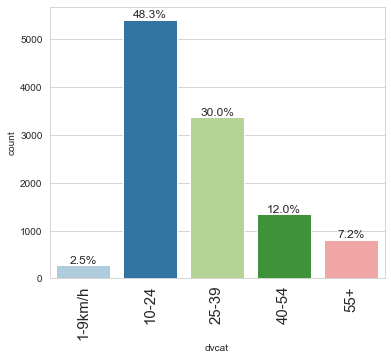

In [1242]:
labeled_barplot(car, "dvcat", perc=True)

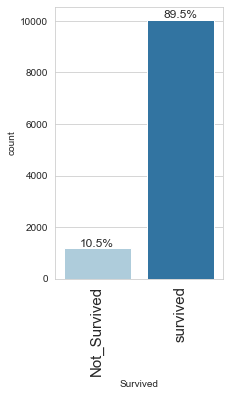

In [1243]:
labeled_barplot(car, "Survived", perc=True)

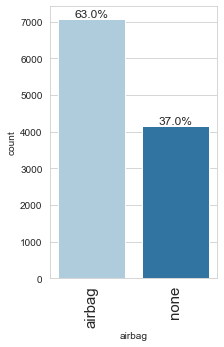

In [1244]:
labeled_barplot(car, "airbag", perc=True)

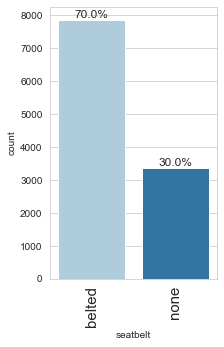

In [1245]:
labeled_barplot(car, "seatbelt", perc=True)

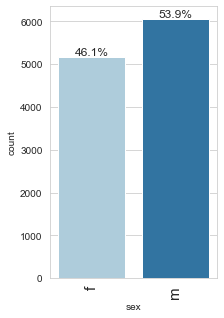

In [1246]:
labeled_barplot(car, "sex", perc=True)

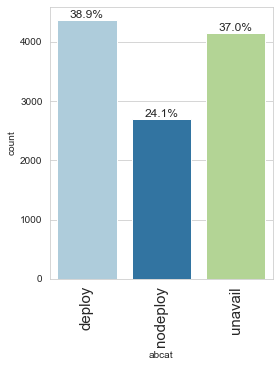

In [1247]:
labeled_barplot(car, "abcat", perc=True)

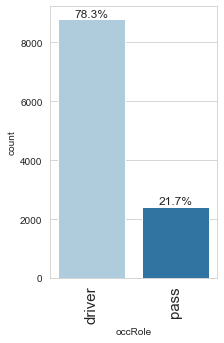

In [1248]:
labeled_barplot(car, "occRole", perc=True)

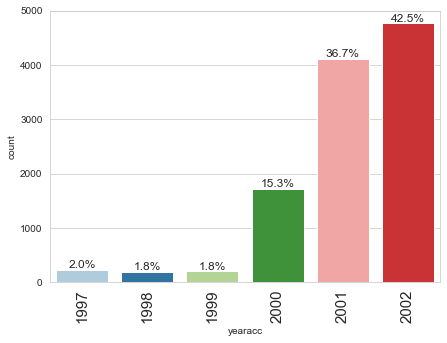

In [1249]:
labeled_barplot(car, "yearacc", perc=True)

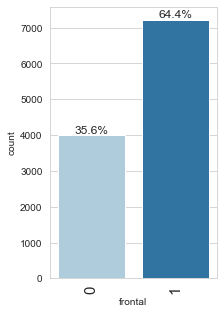

In [1250]:
labeled_barplot(car, "frontal", perc=True)

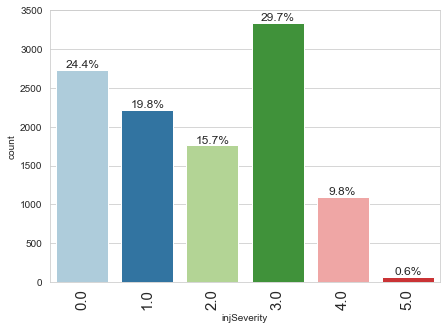

In [1251]:
labeled_barplot(car, "injSeverity", perc=True)

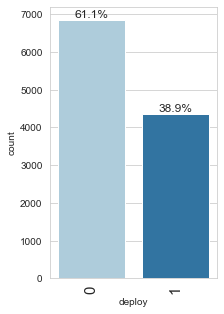

In [1252]:
labeled_barplot(car, "deploy", perc=True)

In [1253]:
# function to plot a boxplot and a histogram along the same scale for numeric data.


def histogram_boxplot(car, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=car, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=car, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=car, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        car[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        car[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

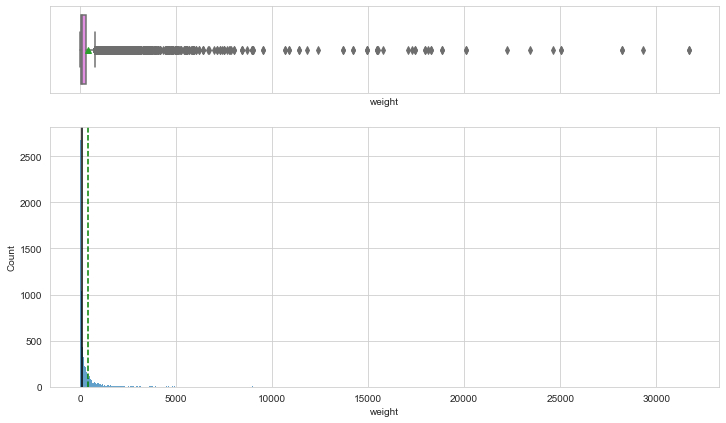

In [1254]:
histogram_boxplot(car, "weight")

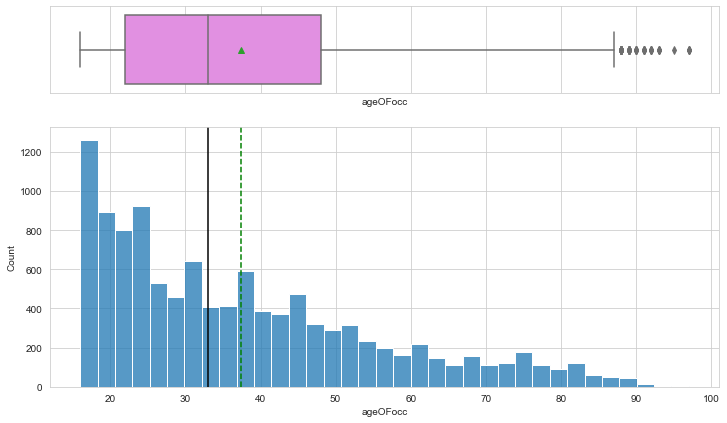

In [1255]:
histogram_boxplot(car, "ageOFocc")

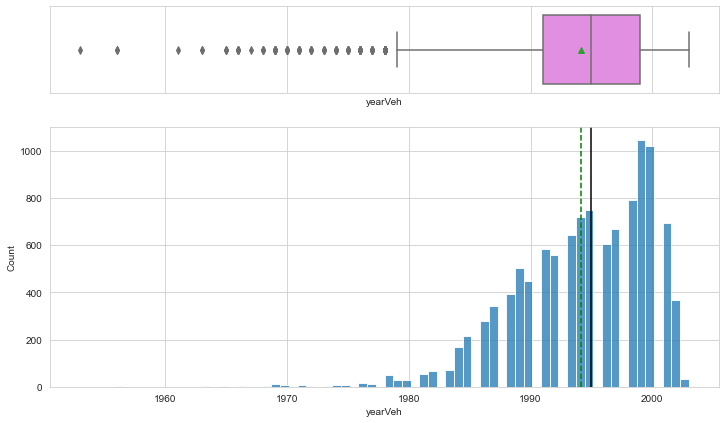

In [1256]:
histogram_boxplot(car, "yearVeh")

#### Bivariate Analysis

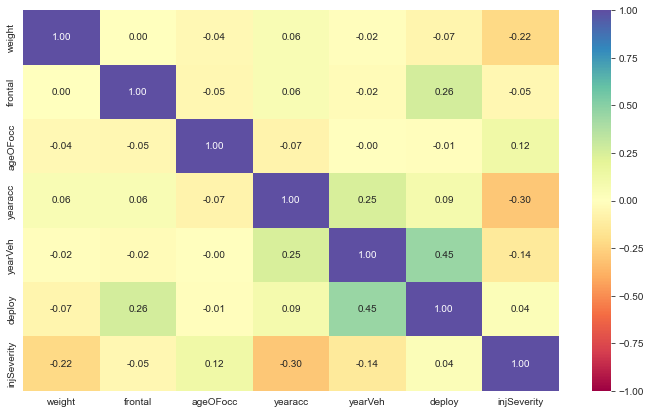

In [1257]:
cols_list = car.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    car[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

In [1258]:
def stacked_barplot(car, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = car[predictor].nunique()
    sorter = car[target].value_counts().index[-1]
    tab1 = pd.crosstab(car[predictor], car[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(car[predictor], car[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Survived  Not_Survived  survived    All
dvcat                                  
All               1180     10037  11217
55+                415       394    809
40-54              344      1000   1344
25-39              304      3064   3368
10-24              114      5300   5414
1-9km/h              3       279    282
------------------------------------------------------------------------------------------------------------------------


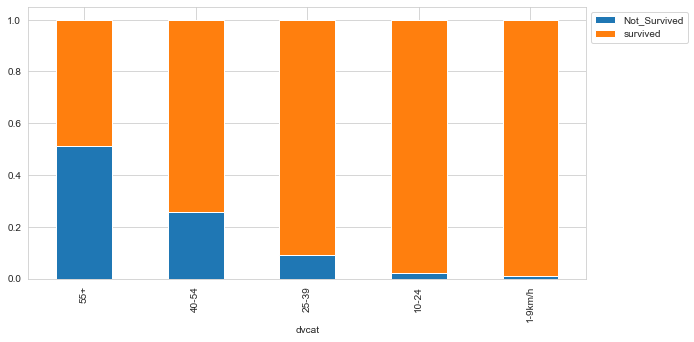

In [1259]:
stacked_barplot(car, "dvcat", "Survived")

Survived  Not_Survived  survived    All
airbag                                 
All               1180     10037  11217
none               669      3484   4153
airbag             511      6553   7064
------------------------------------------------------------------------------------------------------------------------


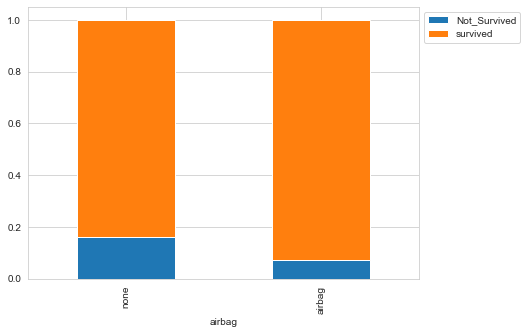

In [1260]:
stacked_barplot(car, "airbag", "Survived")

Survived  Not_Survived  survived    All
seatbelt                               
All               1180     10037  11217
none               680      2688   3368
belted             500      7349   7849
------------------------------------------------------------------------------------------------------------------------


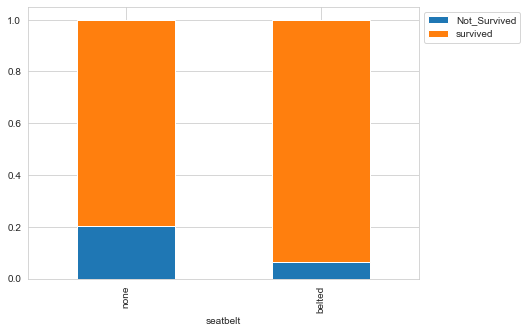

In [1261]:
stacked_barplot(car, "seatbelt", "Survived")

Survived  Not_Survived  survived    All
frontal                                
All               1180     10037  11217
0                  598      3395   3993
1                  582      6642   7224
------------------------------------------------------------------------------------------------------------------------


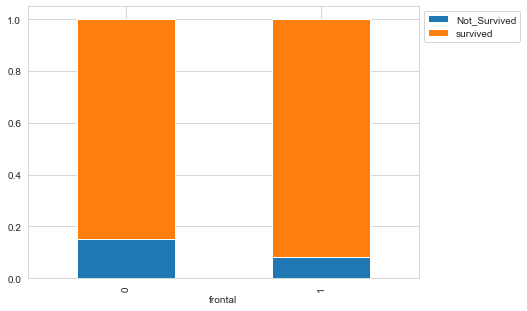

In [1262]:
stacked_barplot(car, "frontal", "Survived")

Survived  Not_Survived  survived    All
sex                                    
All               1180     10037  11217
m                  716      5332   6048
f                  464      4705   5169
------------------------------------------------------------------------------------------------------------------------


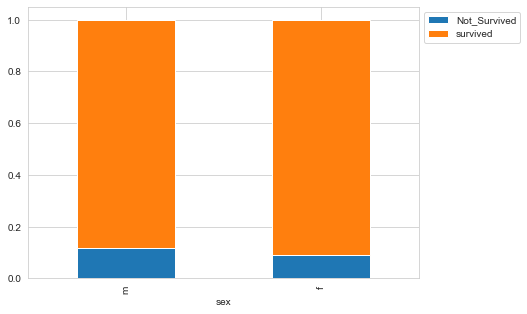

In [1263]:
stacked_barplot(car, "sex", "Survived")

Survived  Not_Survived  survived    All
yearacc                                
All               1180     10037  11217
1997               224         0    224
1999               200         0    200
2002               199      4565   4764
1998               198         0    198
2000               187      1529   1716
2001               172      3943   4115
------------------------------------------------------------------------------------------------------------------------


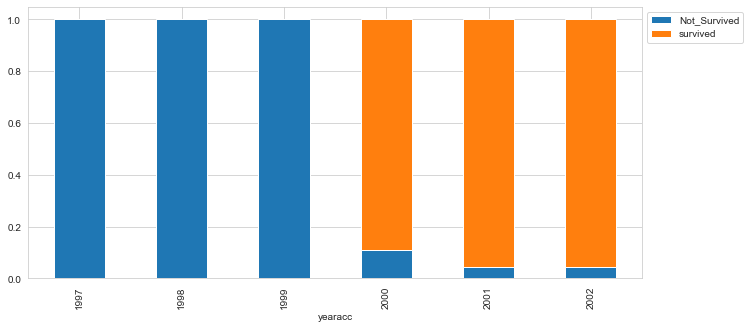

In [1264]:
stacked_barplot(car, "yearacc", "Survived")

Survived  Not_Survived  survived    All
abcat                                  
All               1180     10037  11217
unavail            669      3484   4153
deploy             368      3997   4365
nodeploy           143      2556   2699
------------------------------------------------------------------------------------------------------------------------


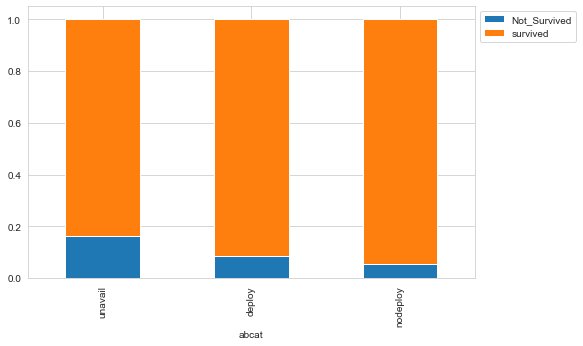

In [1265]:
stacked_barplot(car, "abcat", "Survived")

Survived  Not_Survived  survived    All
occRole                                
All               1180     10037  11217
driver             891      7895   8786
pass               289      2142   2431
------------------------------------------------------------------------------------------------------------------------


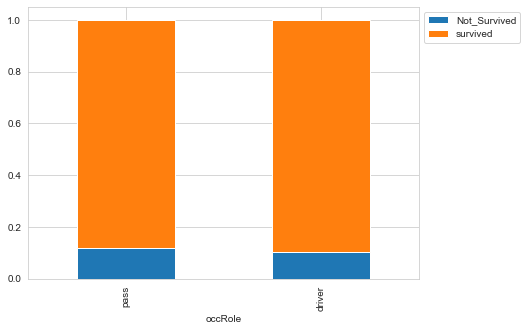

In [1266]:
stacked_barplot(car, "occRole", "Survived")

Survived  Not_Survived  survived    All
deploy                                 
All               1180     10037  11217
0                  812      6040   6852
1                  368      3997   4365
------------------------------------------------------------------------------------------------------------------------


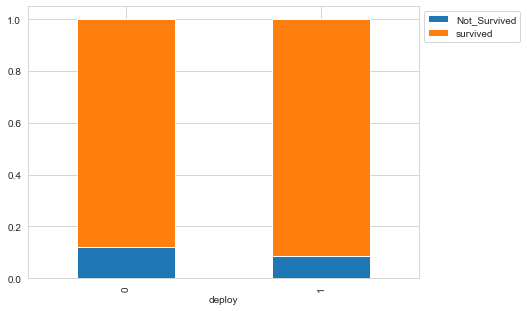

In [1267]:
stacked_barplot(car, "deploy", "Survived")

Survived     Not_Survived  survived    All
injSeverity                               
All                  1180     10037  11217
4.0                  1084        17   1101
3.0                    87      3250   3337
2.0                     7      1752   1759
1.0                     1      2217   2218
5.0                     1        67     68
0.0                     0      2734   2734
------------------------------------------------------------------------------------------------------------------------


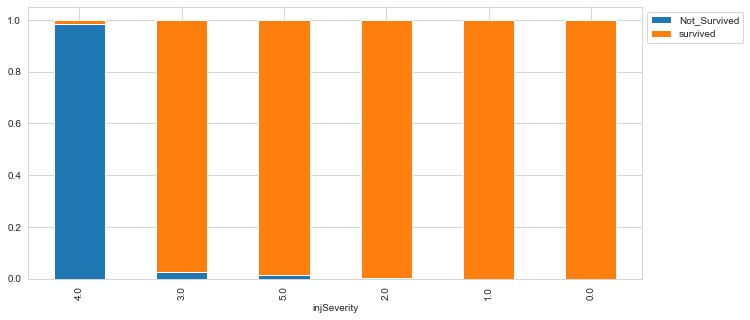

In [1268]:
stacked_barplot(car, "injSeverity", "Survived")

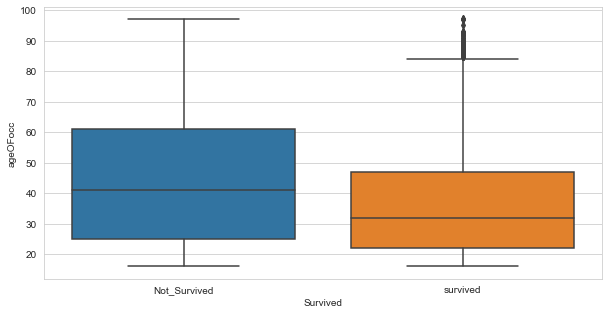

In [1269]:
plt.figure(figsize=(10, 5))
sns.boxplot(car["Survived"], car["ageOFocc"])
plt.show()

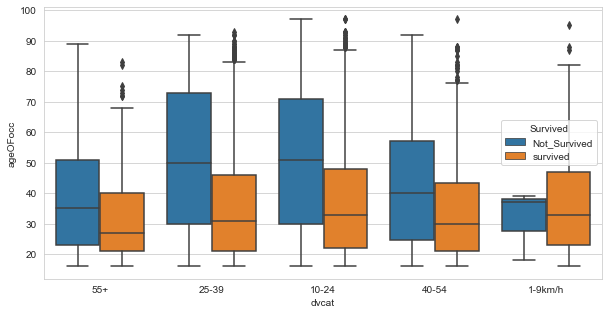

In [1270]:
plt.figure(figsize=(10, 5))
sns.boxplot(car["dvcat"], car["ageOFocc"], hue = car["Survived"])
plt.show()

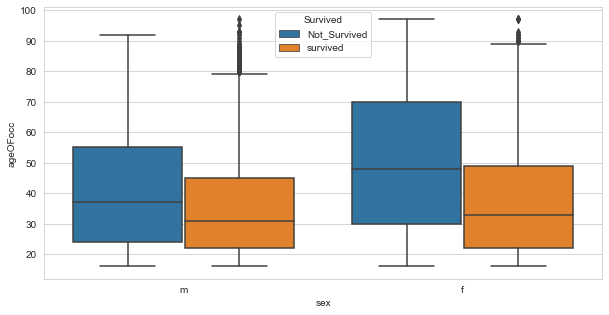

In [1271]:
plt.figure(figsize=(10, 5))
sns.boxplot(car["sex"], car["ageOFocc"], hue = car["Survived"])
plt.show()

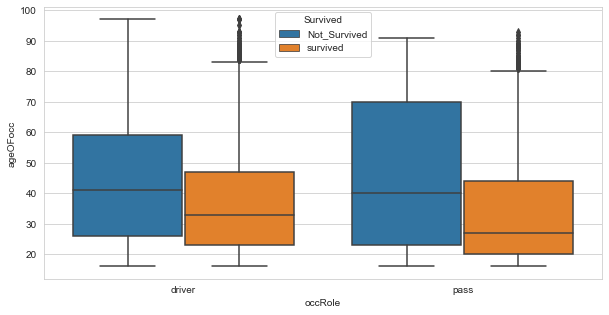

In [1272]:
plt.figure(figsize=(10, 5))
sns.boxplot(car["occRole"], car["ageOFocc"], hue = car["Survived"])
plt.show()

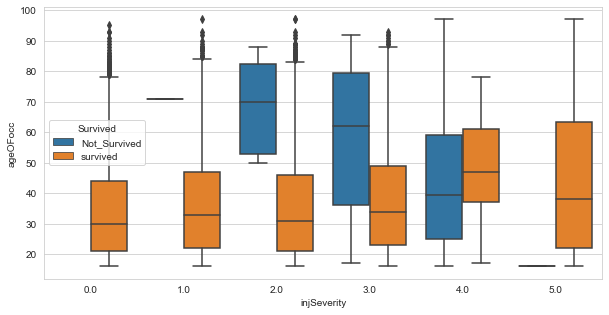

In [1273]:
plt.figure(figsize=(10, 5))
sns.boxplot(car["injSeverity"], car["ageOFocc"], hue = car["Survived"])
plt.show()

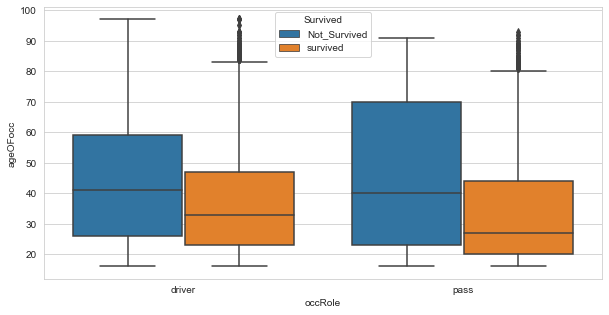

In [1274]:
plt.figure(figsize=(10, 5))
sns.boxplot(x = car["occRole"], y = car["ageOFocc"], hue = car["Survived"])
plt.show()

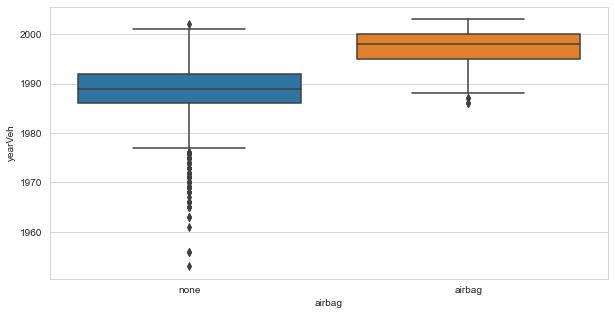

In [1275]:
plt.figure(figsize=(10, 5))
sns.boxplot(x = car["airbag"], y = car["yearVeh"])
plt.show()

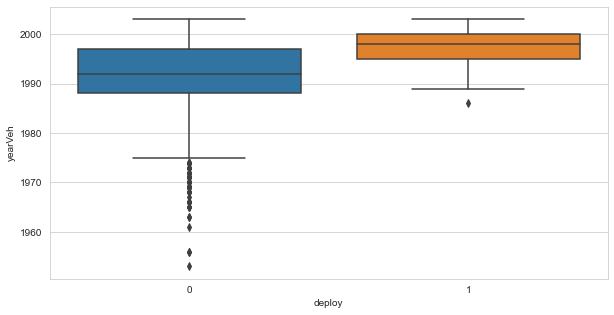

In [1276]:
plt.figure(figsize=(10, 5))
sns.boxplot(x = car["deploy"], y = car["yearVeh"])
plt.show()

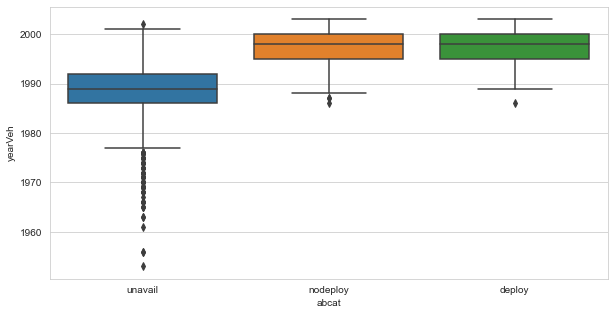

In [1277]:
plt.figure(figsize=(10, 5))
sns.boxplot(x = car["abcat"], y = car["yearVeh"])
plt.show()

In [1278]:
#Treating the outliers
car_num = car.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(car_num.columns.values)
lstnumericcolumns

['weight',
 'frontal',
 'ageOFocc',
 'yearacc',
 'yearVeh',
 'deploy',
 'injSeverity']

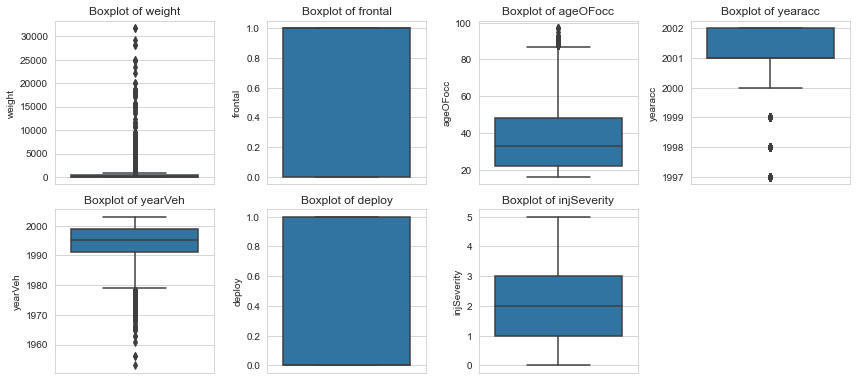

In [1279]:
#Check for presence of outliers in each feature
plt.figure(figsize = (12,8))
feature_list = car_num.columns
for i in range(len(feature_list)):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y = car_num[feature_list[i]], data = car_num)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [1280]:
#Define a function which returns the Upper and Lower limit to detect outliers for each feature
def remove_outlier(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range 

In [1281]:
#Cap & floor the values beyond the outlier boundaries
for i in feature_list:
    LL, UL = remove_outlier(car_num[i])
    car_num[i] = np.where(car_num[i] > UL, UL, car_num[i])
    car_num[i] = np.where(car_num[i] < LL, LL, car_num[i])

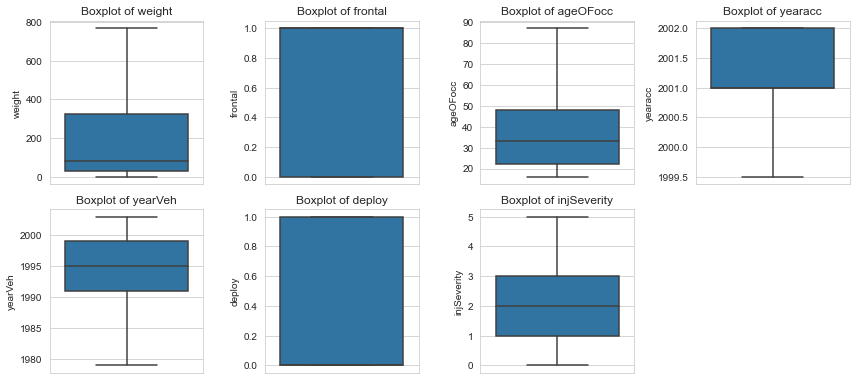

In [1282]:
#Check to verify if outliers have been treated
plt.figure(figsize = (12,8))
feature_list = car_num.columns
for i in range(len(feature_list)):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y = car_num[feature_list[i]], data = car_num)
    plt.title('Boxplot of {}'.format(feature_list[i]))
    plt.tight_layout()

In [1283]:
#Scaling using z-score method
from scipy.stats import zscore
car_num = car_num.apply(zscore)
car_num.head()

,weight,frontal,ageOFocc,yearacc,yearVeh,deploy,injSeverity
0,-0.73440,0.74347,-0.29821,-2.06767,-1.34089,-0.79815,1.58189
1,-0.49562,-1.34505,0.91487,-2.06767,-0.04576,-0.79815,1.58189
2,-0.73440,0.74347,1.63168,-2.06767,-0.41579,-0.79815,1.58189
3,-0.73440,0.74347,1.46626,-2.06767,-0.41579,-0.79815,1.58189
4,-0.78671,0.74347,-0.79447,-2.06767,-1.52591,-0.79815,1.58189


In [1284]:
car_num.describe().T

,count,mean,std,min,25%,50%,75%,max
weight,11217.00000,-0.00000,1.00004,-0.83777,-0.72976,-0.52399,0.39931,2.09293
frontal,11217.00000,-0.00000,1.00004,-1.34505,-1.34505,0.74347,0.74347,0.74347
ageOFocc,11217.00000,-0.00000,1.00004,-1.18044,-0.84960,-0.24307,0.58403,2.73448
yearacc,11217.00000,-0.00000,1.00004,-2.06767,-0.23089,-0.23089,0.99364,0.99364
yearVeh,11217.00000,-0.00000,1.00004,-2.82104,-0.60081,0.13926,0.87934,1.61941
deploy,11217.00000,0.00000,1.00004,-0.79815,-0.79815,-0.79815,1.25290,1.25290
injSeverity,11217.00000,0.00000,1.00004,-1.32972,-0.60182,0.12609,0.85399,2.30980


## 2.2) Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis). 

In [1285]:
# Reset index to align indices for concatenation
car_num.reset_index(drop=True, inplace=True)
car.reset_index(drop=True, inplace=True)

# Concatenate the scaled numerical columns with the original object columns
carcrash = pd.concat([car_num, car.select_dtypes(include='object')], axis=1)

In [1286]:
carcrash.head()

,weight,frontal,ageOFocc,yearacc,yearVeh,deploy,injSeverity,dvcat,Survived,airbag,seatbelt,sex,abcat,occRole
0,-0.73440,0.74347,-0.29821,-2.06767,-1.34089,-0.79815,1.58189,55+,Not_Survived,none,none,m,unavail,driver
1,-0.49562,-1.34505,0.91487,-2.06767,-0.04576,-0.79815,1.58189,25-39,Not_Survived,airbag,belted,f,nodeploy,driver
2,-0.73440,0.74347,1.63168,-2.06767,-0.41579,-0.79815,1.58189,55+,Not_Survived,none,belted,m,unavail,driver
3,-0.73440,0.74347,1.46626,-2.06767,-0.41579,-0.79815,1.58189,55+,Not_Survived,none,belted,f,unavail,pass
4,-0.78671,0.74347,-0.79447,-2.06767,-1.52591,-0.79815,1.58189,55+,Not_Survived,none,none,m,unavail,driver


In [1287]:
#Converting dvcat object to categorical codes in an ordinal manner

carcrash['dvcat']=np.where(carcrash['dvcat'] =='10-24', '1', carcrash['dvcat'])
carcrash['dvcat']=np.where(carcrash['dvcat'] =='25-39', '2', carcrash['dvcat'])
carcrash['dvcat']=np.where(carcrash['dvcat'] =='40-54', '3', carcrash['dvcat'])
carcrash['dvcat']=np.where(carcrash['dvcat'] =='55+', '4', carcrash['dvcat'])
carcrash['dvcat']=np.where(carcrash['dvcat'] =='1-9km/h', '5', carcrash['dvcat'])

In [1288]:
carcrash.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11217 entries, 0 to 11216
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   weight       11217 non-null  float64
 1   frontal      11217 non-null  float64
 2   ageOFocc     11217 non-null  float64
 3   yearacc      11217 non-null  float64
 4   yearVeh      11217 non-null  float64
 5   deploy       11217 non-null  float64
 6   injSeverity  11217 non-null  float64
 7   dvcat        11217 non-null  object 
 8   Survived     11217 non-null  object 
 9   airbag       11217 non-null  object 
 10  seatbelt     11217 non-null  object 
 11  sex          11217 non-null  object 
 12  abcat        11217 non-null  object 
 13  occRole      11217 non-null  object 
dtypes: float64(7), object(7)
memory usage: 1.2+ MB


In [1289]:
carcrash_dummy = pd.get_dummies(carcrash,drop_first=True)
carcrash_dummy.head()

,weight,frontal,ageOFocc,yearacc,yearVeh,deploy,injSeverity,dvcat_2,dvcat_3,dvcat_4,dvcat_5,Survived_survived,airbag_none,seatbelt_none,sex_m,abcat_nodeploy,abcat_unavail,occRole_pass
0,-0.73440,0.74347,-0.29821,-2.06767,-1.34089,-0.79815,1.58189,0,0,1,0,0,1,1,1,0,1,0
1,-0.49562,-1.34505,0.91487,-2.06767,-0.04576,-0.79815,1.58189,1,0,0,0,0,0,0,0,1,0,0
2,-0.73440,0.74347,1.63168,-2.06767,-0.41579,-0.79815,1.58189,0,0,1,0,0,1,0,1,0,1,0
3,-0.73440,0.74347,1.46626,-2.06767,-0.41579,-0.79815,1.58189,0,0,1,0,0,1,0,0,0,1,1
4,-0.78671,0.74347,-0.79447,-2.06767,-1.52591,-0.79815,1.58189,0,0,1,0,0,1,1,1,0,1,0


### Train Test Split 

In [1290]:
# Copy all the predictor variables into X dataframe
X = carcrash_dummy.drop('Survived_survived', axis=1)

# Copy target into the y dataframe. 
y =  carcrash_dummy['Survived_survived']

In [1291]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=carcrash_dummy['Survived_survived'])

In [1292]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (7851, 17)
Shape of test set :  (3366, 17)
Percentage of classes in training set:
1   0.89479
0   0.10521
Name: Survived_survived, dtype: float64
Percentage of classes in test set:
1   0.89483
0   0.10517
Name: Survived_survived, dtype: float64


## Logistic regression model 

In [1293]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    3.3s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [1294]:
#Predicting on Training and Test dataset
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [1295]:
#Getting the Predicted Classes and Probs
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.02561,0.97439
1,0.00136,0.99864
2,0.00305,0.99695
3,0.00000,1.00000
4,0.01472,0.98528


In [1296]:
#Model Evaluation
#Accuracy - Training Data
model.score(X_train, y_train)

0.980894153611005

AUC: 0.990


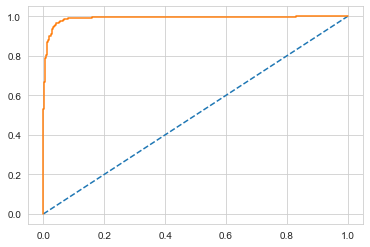

In [1297]:
#AUC and ROC for the training data
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [1298]:
# Accuracy - Test Data
model.score(X_test, y_test)

0.9824717765894236

AUC: 0.990


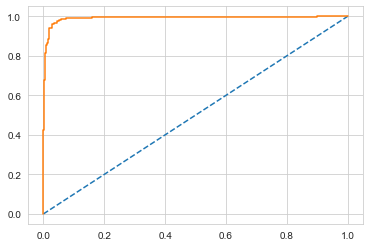

In [1299]:
#AUC and ROC for the test data
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [1300]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,ConfusionMatrixDisplay

[[ 732   94]
 [  56 6969]]


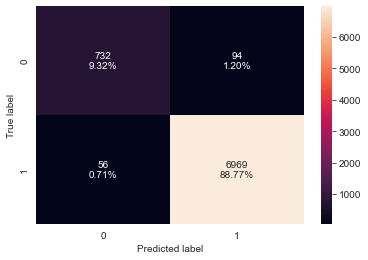

In [1301]:
#Confusion Matrix for the training data
a = confusion_matrix(y_train, ytrain_predict)
print(a)
confusion_matrix_sklearn(model, X_train, y_train) 

In [1302]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       826
           1       0.99      0.99      0.99      7025

    accuracy                           0.98      7851
   macro avg       0.96      0.94      0.95      7851
weighted avg       0.98      0.98      0.98      7851



[[ 315   39]
 [  20 2992]]


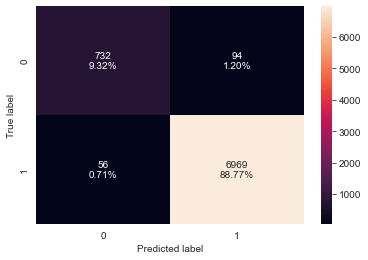

In [1303]:
#Confusion Matrix for test data
b = confusion_matrix(y_test, ytest_predict)
print(b)
confusion_matrix_sklearn(model, X_train, y_train) 

In [1304]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       354
           1       0.99      0.99      0.99      3012

    accuracy                           0.98      3366
   macro avg       0.96      0.94      0.95      3366
weighted avg       0.98      0.98      0.98      3366



##  Linear Discriminant Analysis Model 

In [1305]:
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [1306]:
#Checking model performance on training set
lda_perf_train = model_performance_classification_sklearn(model,X_train, y_train) 
lda_perf_train

,Accuracy,Recall,Precision,F1
0,0.95402,0.97566,0.97303,0.97434


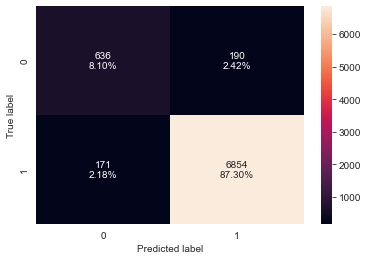

In [1307]:
confusion_matrix_sklearn(model,X_train, y_train) 

In [1308]:
#Checking model performance on test set
lda_perf_test = model_performance_classification_sklearn(model,X_test, y_test) 
lda_perf_test

,Accuracy,Recall,Precision,F1
0,0.95395,0.97477,0.97380,0.97428


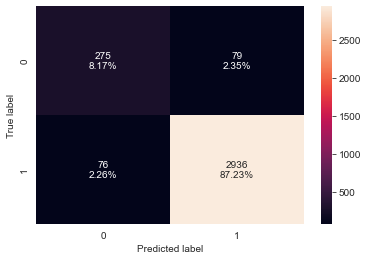

In [1309]:
confusion_matrix_sklearn(model,X_test, y_test) ## Complete the code to create confusion matrix for test data

AUC: 0.971


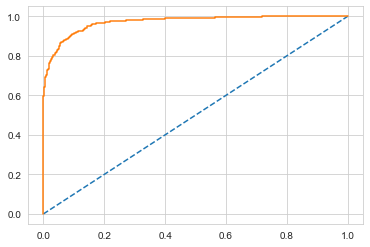

In [1310]:
#AUC and ROC for the training data
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

AUC: 0.971


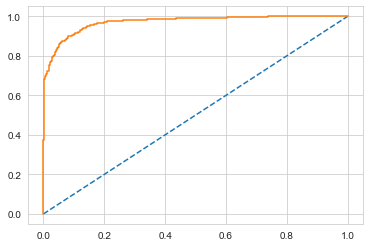

In [1311]:
#AUC and ROC for the test data
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [1312]:
X.shape

(11217, 17)

In [1313]:
model.coef_

array([[-0.25109185,  0.43014331, -0.51982118,  1.51960082,  0.02632975,
         0.03827632, -2.01295504, -0.07270798, -1.69107669, -5.07950918,
        -0.17380043, -0.06056497, -0.51384079, -0.44938786, -0.02698532,
        -0.06056497, -0.40937341]])

In [1314]:
model.intercept_

array([6.35505939])

In [1315]:
X.columns

Index(['weight', 'frontal', 'ageOFocc', 'yearacc', 'yearVeh', 'deploy',
       'injSeverity', 'dvcat_2', 'dvcat_3', 'dvcat_4', 'dvcat_5',
       'airbag_none', 'seatbelt_none', 'sex_m', 'abcat_nodeploy',
       'abcat_unavail', 'occRole_pass'],
      dtype='object')

In [1316]:
a=model.coef_
np.round(a,2) # rounded up coefficients 

array([[-0.25,  0.43, -0.52,  1.52,  0.03,  0.04, -2.01, -0.07, -1.69,
        -5.08, -0.17, -0.06, -0.51, -0.45, -0.03, -0.06, -0.41]])